<a href="https://colab.research.google.com/github/kfukutom/stats206-w24-uofm/blob/main/kenfukutomi_hw06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics 206, Homework 6

As a helpful reminder, please direct questions to Piazza. This will get them the most attention (all GSIs, instructor, fellow students).


In [19]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import statsmodels.api as sm

pd.options.mode.chained_assignment = None
np.random.seed(206206)

In [20]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [21]:
nhanes = pd.read_csv("/content/gdrive/MyDrive/Stats 206 Winter 2024/data/nhanes.csv.gz")
nhanes["RIAGENDR"] = nhanes["RIAGENDR"].replace([1,2], ["Male", "Female"]).astype("category")


In [22]:
nhanes

,SEQN,RIDAGEYR,RIAGENDR,BMXWT,BMXHT,BMXBMI,BPXSY1,BPXSY2,BPXSY3
0,83732.0,62.0,Male,94.8,184.5,27.8,128.0,124.0,116.0
1,83733.0,53.0,Male,90.4,171.4,30.8,146.0,140.0,134.0
2,83734.0,78.0,Male,83.4,170.1,28.8,138.0,132.0,136.0
3,83735.0,56.0,Female,109.8,160.9,42.4,132.0,134.0,136.0
4,83736.0,42.0,Female,55.2,164.9,20.3,100.0,114.0,98.0
...,...,...,...,...,...,...,...,...,...
9539,93698.0,2.0,Male,NaN,NaN,NaN,NaN,NaN,NaN
9540,93699.0,6.0,Female,29.0,126.2,18.2,NaN,NaN,NaN
9541,93700.0,35.0,Male,78.2,173.3,26.0,104.0,106.0,104.0
9542,93701.0,8.0,Male,28.8,126.0,18.1,114.0,114.0,114.0


## Question 1

Let's load and review the National Health and Nutrition Examination Survey (NHANES) data.

In [23]:
nhanes["RIDAGEYR"]

0       62.0
1       53.0
2       78.0
3       56.0
4       42.0
        ... 
9539     2.0
9540     6.0
9541    35.0
9542     8.0
9543    24.0
Name: RIDAGEYR, Length: 9544, dtype: float64

### Q1.a

Previously, we've focused on people over the age of 18. In this question, we will look at children.

Create a table based on `nhanes` that only contains people under the age of 19 (i.e. 18 and younger). Call this table `youth`.

Create a scatter plot of `BMXHT` (y-axis) and `RIDAGEYR` (x-axis). Briefly comment on the direction of this relationship. Does it seem like data where a straight line would be a reasonable approximation for the conditional mean?

In [24]:
youth = nhanes.loc[nhanes["RIDAGEYR"] < 19]
youth

,SEQN,RIDAGEYR,RIAGENDR,BMXWT,BMXHT,BMXBMI,BPXSY1,BPXSY2,BPXSY3
6,83738.0,11.0,Female,37.2,143.5,18.1,102.0,98.0,100.0
7,83739.0,4.0,Male,16.4,102.1,15.7,NaN,NaN,NaN
8,83740.0,1.0,Male,10.1,NaN,NaN,NaN,NaN,NaN
11,83743.0,18.0,Male,72.4,166.1,26.2,NaN,NaN,NaN
13,83745.0,15.0,Female,71.7,169.2,25.0,108.0,120.0,106.0
...,...,...,...,...,...,...,...,...,...
9534,93693.0,7.0,Male,33.0,135.4,18.0,NaN,NaN,NaN
9535,93694.0,7.0,Male,36.2,124.7,23.3,NaN,NaN,NaN
9539,93698.0,2.0,Male,NaN,NaN,NaN,NaN,NaN,NaN
9540,93699.0,6.0,Female,29.0,126.2,18.2,NaN,NaN,NaN


Axes(0.125,0.11;0.775x0.77)


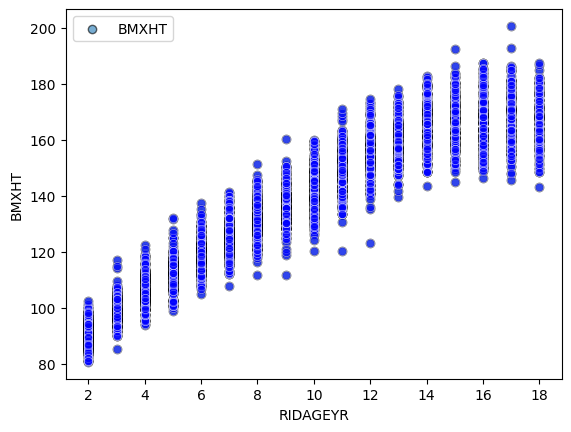

In [25]:
"""
Create a scatter plot of BMXHT (y-axis) and RIDAGEYR (x-axis). Briefly comment on the direction of this relationship.
Does it seem like data where a straight line would be a reasonable approximation for the conditional mean?
"""
x = plt.scatter(data=youth, x="RIDAGEYR", y="BMXHT", alpha = 0.6, edgecolors="black")
y = sb.scatterplot(data=youth, x=youth["RIDAGEYR"], y=youth["BMXHT"], color="blue", alpha=0.6)
print(y)

There is definitely a left skew distribution going on in this scatterplot.

### Q1.b

For these data, we may be better off treating them as ordinal (at least to start). Stratify on age, and compute the conditional mean of height within each age category (the `reset_index()` method will probably be helpful for the next step).

Show the results as a line plot.

Does this confirm that a straight line may be a reasonable approximation to the true conditional mean function? Might it be better to restrict out analysis to a certain age range?

In [26]:
nhanes.columns

Index(['SEQN', 'RIDAGEYR', 'RIAGENDR', 'BMXWT', 'BMXHT', 'BMXBMI', 'BPXSY1',
       'BPXSY2', 'BPXSY3'],
      dtype='object')

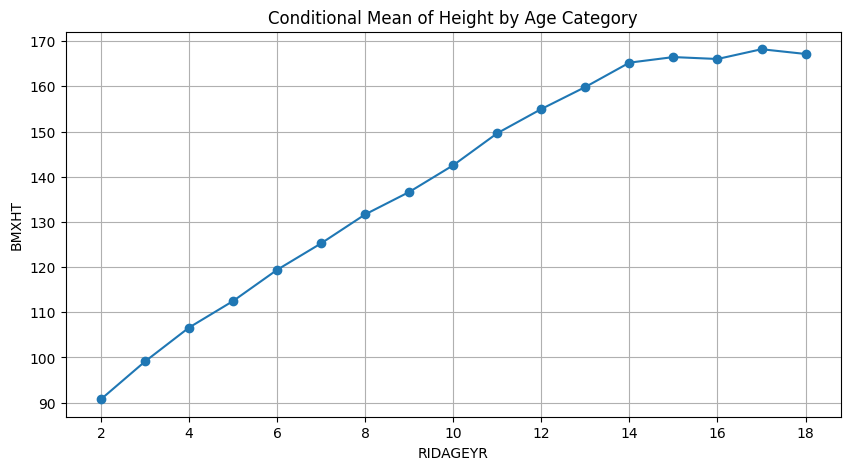

In [27]:
nhanes_age_height = youth.groupby('RIDAGEYR')['BMXHT'].mean().reset_index()

plt.figure(figsize=(10, 5))
plt.plot(nhanes_age_height['RIDAGEYR'], nhanes_age_height['BMXHT'], marker ='o')
plt.title('Conditional Mean of Height by Age Category')
plt.xlabel('RIDAGEYR')
plt.ylabel('BMXHT')
plt.grid(True)
plt.show()

when we plot the average height by age, you're looking for how smoothly the plot points, which represents the average height for an age category, in youth, then using linear regression approximation, we can estimate how height changes with each increment of the age value. But, looking at this graph, we notice that the dots begin to veer off a straight path as it reaches a certain "threshold" age, which likely indicates an leveling out of height data at this age category.

### Q1.c

Using the plot from the previous problem, select a new upper cutoff for age. Create a table restricted to those ages (call it `under_AGE`, where `AGE` is the value you select as a cutoff, such 8).

Compute the correlation of age and height for the `youth` table and also for the `under_AGE` table. What are these values telling you?

In [28]:
under_AGE = youth[youth["RIDAGEYR"] < 8]

In [29]:
x = youth["RIDAGEYR"].corr(youth['BMXHT'])
y = under_AGE["RIDAGEYR"].corr(under_AGE['BMXHT'])
print(x)
print(y)

0.9445055050530238
0.9133268148315347


### Q1.d

Use `sm.OLS` to fit a linear regression to these the `under_AGE` data (with $x$ as `RIDAGEYR` and $y$ as `BMXHT`). Don't forget to use `sm.add_constant`.

Interpret the slope parameter. What does it tell us about the average heights of groups of children who differ in age by one year?

In [30]:
under_AGE = under_AGE.dropna(subset=["BMXHT"])
under_AGE.isnull().sum()

SEQN           0
RIDAGEYR       0
RIAGENDR       0
BMXWT          2
BMXHT          0
BMXBMI         2
BPXSY1      1259
BPXSY2      1259
BPXSY3      1259
dtype: int64

In [31]:
X = under_AGE['RIDAGEYR']
y = under_AGE['BMXHT']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  BMXHT   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     6323.
Date:                Tue, 19 Mar 2024   Prob (F-statistic):               0.00
Time:                        19:34:32   Log-Likelihood:                -3909.9
No. Observations:                1259   AIC:                             7824.
Df Residuals:                    1257   BIC:                             7834.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         78.0103      0.415    187.963      0.0

### Q1.e

Using the previous result, what does the model tell us is the average height for a 10 year old?

What would this model predict for a 40 year old. Does this seem reasonable?

In [32]:
fourty = nhanes.loc[nhanes["RIDAGEYR"] == 40]
X = fourty['RIDAGEYR']
y = fourty['BMXHT']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  BMXHT   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 19 Mar 2024   Prob (F-statistic):                nan
Time:                        19:34:32   Log-Likelihood:                -359.88
No. Observations:                  93   AIC:                             721.8
Df Residuals:                      92   BIC:                             724.3
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RIDAGEYR       4.1497      0.030    137.291      0.0

## Question 2

Lets return to two of our earlier data sets and perform some linear regression to re-investigate some of the analyses we did previously.



In [33]:
acs = pd.read_csv("/content/gdrive/MyDrive/Stats 206 Winter 2024/data/pums_short.csv.gz")

### Q2.a

First, we will look at the American Community Survey (ACS) data of households in the United States.

Perform a linear regression on the variables "VALP" ($Y$) and "HINCP" ($X$). Interpret the value of the coefficient? Compare two groups that differe on household income by \$10,000. What would the average difference in property values be for these two groups?

In [34]:
acs = acs.dropna(subset=['HINCP', 'VALP'])
acs = acs.replace([np.inf, -np.inf], np.nan).dropna(subset=['HINCP', 'VALP'])
X = acs["HINCP"]
y = acs["VALP"]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

slope = model.params['HINCP']
difference_valp = slope * 10000
print(f"Average difference is property values: ${difference_valp}")

                            OLS Regression Results                            
Dep. Variable:                   VALP   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                 3.977e+04
Date:                Tue, 19 Mar 2024   Prob (F-statistic):               0.00
Time:                        19:34:35   Log-Likelihood:            -2.5274e+06
No. Observations:              176604   AIC:                         5.055e+06
Df Residuals:                  176602   BIC:                         5.055e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.42e+05   1306.273    108.680      0.0

In [35]:
acs.columns

Index(['DIVISION', 'PUMA', 'REGION', 'ST', 'NP', 'MRGP', 'RNTP', 'TEN', 'VALP',
       'VEH', 'YBL', 'FES', 'FINCP', 'FPARC', 'HHT', 'HINCP', 'HUPAC', 'MV',
       'NOC', 'NPF', 'NR', 'NRC', 'PARTNER', 'R18', 'R60', 'R65', 'TAXAMT',
       'WIF', 'WKEXREL', 'WORKSTAT', 'FFINCP'],
      dtype='object')

**The coefficient here is telling us that the average change in the property value for every 1 dollar increase in the household income. The calculation and the interpretation can both provide insights into valuable information(s) that are associated with the property's valye as well as the fit of the linear model within the newly cleansed dataset, without the NaN values, properties in the two desired columns of research.**

### Q2.b






* Create a variable `has_65` that is True when a household as at least one person 65 or older using the `R65` variable already in the `acs` table.
* Calling `has_65` $X$ and `HINCP` $Y$, compute the conditional means  $\bar Y \mid X = 1$ and $\bar Y \mid X = 0$ (recall that True is equivalent to 1 and False is equivalent to 0).
* Compute the difference in conditional means.

In [57]:
acs["has_65"] = (acs["R65"]).astype(bool)
conditional_mean = acs.groupby('has_65')['HINCP'].mean()
print(f"Conditional Mean: {conditional_mean}")

mean_income_65 = conditional_mean[True]
mean_income_wo_65 = conditional_mean[False]
var_diff = mean_income_65 - mean_income_wo_65

print(f"Mean income with atleast one family member of age 65 or older in a household: ${mean_income_65.round(3)}")
print(f"Mean income without anyone of age 65 or older in a household: ${mean_income_wo_65.round(3)}")
print(f"The difference in income: {var_diff.round(2)}")

Conditional Mean: has_65
False    118348.961978
True      81629.257677
Name: HINCP, dtype: float64
Mean income with atleast one family member of age 65 or older in a household: $81629.258
Mean income without anyone of age 65 or older in a household: $118348.962
The difference in income: -36719.7


### Q2.c

Note: while Python almost always treats True and False and 1 and 0, one exception it the OLS function. Use `.astype("int")` to convert your `has_65` variable to actual 1 and 0 values.

* Run a regression of household income ($Y$) on the 0/1 version of `has_65` ($X$) and show the fitted coefficients.
* Calculate the conditional means for $X = 1$ and $X = 0$ according to this model.
* What do you notice about these results compared to the previous step? What is another interpretation of the slope coefficient when $X$ is a 0/1 variable?



In [46]:
acs["has_65"] = (acs["R65"]).astype(int)
X = acs["has_65"]
y = acs["HINCP"]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  HINCP   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     2813.
Date:                Tue, 19 Mar 2024   Prob (F-statistic):               0.00
Time:                        19:43:08   Log-Likelihood:            -2.2968e+06
No. Observations:              176604   AIC:                         4.594e+06
Df Residuals:                  176602   BIC:                         4.594e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.137e+05    320.454    354.795      0.0

**The contrast between direct calculations or average outcomes from the data and indirect inferences derived from regression coefficients probably yields meaningful insights into the nature of the linear regressions and associations captured by the Ordinary Least Squares (OLS) regression. In my study, I helped quantify the comparison helps elucidate any presumptions or constraints embedded within the linear modeling technique. When examining a binary (0/1) predictor variable within a regression model, the slope coefficient signifies the mean differential in the response variable between the binary categories established by the predictor. Specifically, this predictor variable measures the impact on household income of including at least one individual aged 65 or above.**

## Question 3
In this problem, we will return to the full `nhanes` data set.

### Q3.a

Create a new column that is `1` or `True` when the subject is female and `0` or `False` otherwise.
Call it `is_female`.

In [39]:
nhanes["is_female"] = (nhanes['RIAGENDR'] == 'Female').astype(int)

Compute the proportion of rows that are labeled "Female."

In [44]:
female_proportion = nhanes['is_female'].mean()
print(f"The proportion of rows labeled 'is_female' is  {female_proportion.round(4)}")

The proportion of rows labeled 'is_female' is  0.5101


What if we were to select an observation at random (with equally probability of picking each observation) from this data set, what is the approximate probability I would select a female subject?

**The approximate probability of picking a female subject at random given this observation, would be the value of the female_proportions variable. In other words, if each observation has an equal chance of being selected, then the probability of selecting a female is approximately the same as the proportion of rows labeled 'Female', which is 0.5101 or 51.01%.**

### Q3.b



Here is some example code that randomly selects 1 person and sees if that person has a height less than or equal to 140cm.

In [37]:
np.random.seed(206101) # makes sure result is always the same even though it is "random"
person = nhanes["BMXHT"].dropna().sample()
(person, person <= 140)

(7844    168.9
 Name: BMXHT, dtype: float64,
 7844    False
 Name: BMXHT, dtype: bool)

This code repeats that process 1,000,000 times.

In [38]:
np.random.seed(206101) # makes sure result is always the same even though it is "random"
samples = nhanes["BMXHT"].dropna().sample(1000000, replace = True)
(samples <= 140).mean()

0.196836

Repeat the simulation above but instead find the probability of (uniformly) selecting a NHANES subject who is female. Compare this to the value we computed in 3.a and explain why they are similar.